In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [44]:
df = pd.read_csv('MLR-Feature-Elimination.csv')
df.head()

,c1,c2,c26,c27,c28,c29,c30,c31,c32,c33,...,c19,c20,c21,c22,c23,c34,c35,c36,c52,c241
0,43344,2,493.796764,104.553871,41.187601,290.965340,14.379552,71.731990,48.679005,-69.203403,...,13.599070,7.120964,9.257515,2.743170,44.703468,0.147467,1.454651,0.049850,7.870521,2.184083
1,43345,2,493.661889,104.513206,41.580752,290.621190,14.315323,78.599820,48.057417,-69.414081,...,13.167193,7.793413,9.218110,2.596314,43.973557,0.225583,1.457910,0.049859,7.897945,2.233879
2,43346,2,495.644947,104.502457,40.744572,292.152424,14.566180,78.832458,47.320586,-69.645378,...,12.611031,7.289157,9.599612,2.557701,43.966172,0.197137,1.461920,0.049648,7.609317,2.088296
3,43347,2,494.354041,104.452871,40.288181,292.676229,14.605181,72.736626,47.980460,-69.452794,...,14.832367,7.958076,9.436385,2.897314,43.154569,0.168861,1.490899,0.049995,8.095649,2.089270
4,43348,2,492.051373,104.488584,41.266692,289.017462,14.548926,76.621067,48.217299,-69.344057,...,15.943873,8.757605,9.954739,2.917772,43.044778,0.244714,1.473343,0.049860,7.739171,2.096676


In [45]:
#Copying the Data to the respective Variables

Y=df['c52']
Temp_X=df
X=Temp_X.drop('c52',axis=1)
del Temp_X
print(X.head())

      c1  c2         c26         c27        c28         c29        c30  \
0  43344   2  493.796764  104.553871  41.187601  290.965340  14.379552   
1  43345   2  493.661889  104.513206  41.580752  290.621190  14.315323   
2  43346   2  495.644947  104.502457  40.744572  292.152424  14.566180   
3  43347   2  494.354041  104.452871  40.288181  292.676229  14.605181   
4  43348   2  492.051373  104.488584  41.266692  289.017462  14.548926   

         c31        c32        c33  ...        c17        c19       c20  \
0  71.731990  48.679005 -69.203403  ...  28.334700  13.599070  7.120964   
1  78.599820  48.057417 -69.414081  ...  28.211453  13.167193  7.793413   
2  78.832458  47.320586 -69.645378  ...  28.949064  12.611031  7.289157   
3  72.736626  47.980460 -69.452794  ...  33.964274  14.832367  7.958076   
4  76.621067  48.217299 -69.344057  ...  36.744817  15.943873  8.757605   

        c21       c22        c23       c34       c35       c36      c241  
0  9.257515  2.743170  44.703

In [46]:
import statsmodels.api as sm


In [47]:
#Here,we don't need to add any constants as we are already having a column of constants (c2)
mlr_model = sm.OLS(Y, X).fit()
print(mlr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    c52   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     97.90
Date:                Sat, 02 Sep 2023   Prob (F-statistic):          6.30e-308
Time:                        22:10:28   Log-Likelihood:                -1454.7
No. Observations:                1025   AIC:                             2989.
Df Residuals:                     985   BIC:                             3187.
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c1             0.0006      0.000      1.191      0.2

In [49]:
#Prediction of Y
y_predicted=mlr_model.predict(X)
y_predicted.head()

0    7.710503
1    8.167507
2    7.867975
3    6.344570
4    5.990533
dtype: float64

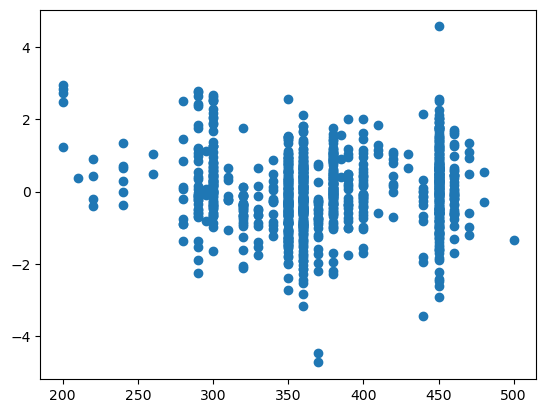

In [53]:
error=Y-y_predicted
plt.scatter(X['c161'],error)

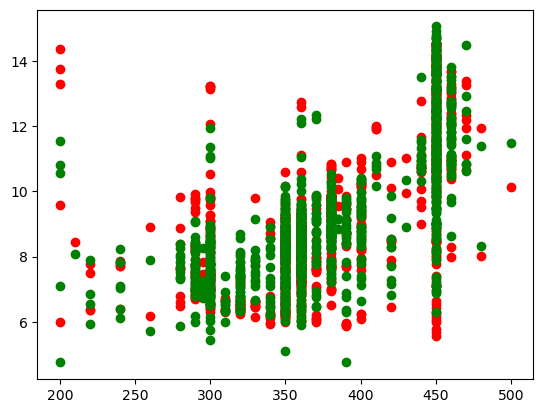

In [55]:
#I have considered to plot the errors against the column 161 as it was having p value significantly less than 0.05
#and also the minimum stderror
plt.scatter(X['c161'],Y,color='Red')
plt.scatter(X['c161'],y_predicted,color='Green')


In [70]:
#The above is the predicted Data before removing the least significant columns

# The columns having a p-value of greater than 0.05 are:
# c1,c2,c27,c32,c33,c160,c162,c7,c12,c13,c19,c34,c22,c36
# Out of which c36 is having the highest p-value of  0.972

# So,now we are going to remove those columns from X and perform the analysis again!

X_final_1=X.drop(['c1','c27','c32','c33','c160','c162','c7','c12','c13','c19','c34','c22','c36'],axis=1)

In [71]:
mlr_model_final_1= sm.OLS(Y, X_final_1).fit()
print(mlr_model_final_1.summary())


                            OLS Regression Results                            
Dep. Variable:                    c52   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     141.0
Date:                Sat, 02 Sep 2023   Prob (F-statistic):          2.60e-312
Time:                        22:50:40   Log-Likelihood:                -1476.6
No. Observations:                1025   AIC:                             3007.
Df Residuals:                     998   BIC:                             3140.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c2           -72.7881      8.132     -8.951      0.0

In [72]:
#Again we are having columns with p-value greater than 0.05,lets remove it!
# c11,c142,c26
X_final_2=X_final_1.drop(['c11','c142','c26'],axis=1)
mlr_model_final= sm.OLS(Y, X_final_2).fit()
print(mlr_model_final.summary())


                            OLS Regression Results                            
Dep. Variable:                    c52   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     141.5
Date:                Sat, 02 Sep 2023   Prob (F-statistic):          3.12e-295
Time:                        22:50:50   Log-Likelihood:                -1524.9
No. Observations:                1025   AIC:                             3098.
Df Residuals:                    1001   BIC:                             3216.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c2            -1.5721      3.740     -0.420      0.6

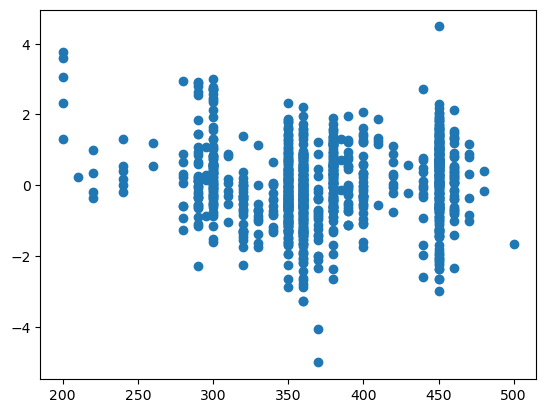

In [73]:
y_predicted_final=mlr_model_final.predict(X_final_2)
y_predicted_final.head()

error_final=Y-y_predicted_final
plt.scatter(X_final_2['c161'],error_final)

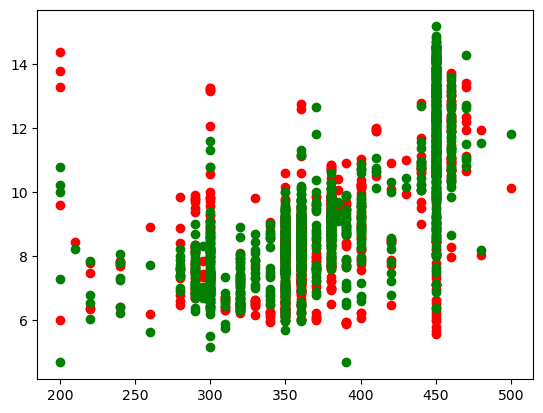

In [74]:
plt.scatter(X_final_2['c161'],Y,color='Red')
plt.scatter(X_final_2['c161'],y_predicted_final,color='Green')


In [75]:
#The above is a better model with all the columns having p-value <0.05 which are significantly impacting the given model
#The above regression model is ceentered on c2,now if we remove c2,then we will have a better value of R2


In [81]:
X_final_3=X.drop(['c1','c27','c12','c2','c32','c33','c160','c162','c7','c12','c13','c19','c34','c22','c36'],axis=1)
X_final_4=X_final_3.drop(['c11','c142','c26'],axis=1)


In [82]:
mlr_model_final= sm.OLS(Y, X_final_4).fit()
print(mlr_model_final.summary())

                                 OLS Regression Results                                
Dep. Variable:                    c52   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                              3287.
Date:                Sat, 02 Sep 2023   Prob (F-statistic):                        0.00
Time:                        22:53:59   Log-Likelihood:                         -1525.0
No. Observations:                1025   AIC:                                      3096.
Df Residuals:                    1002   BIC:                                      3209.
Df Model:                          23                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

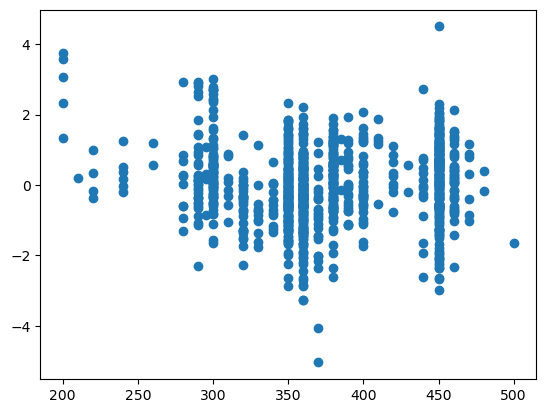

In [84]:
#Now we can see that the value of R2 has increases considerably from 0.765 to 0.987!!
#This occurs when we remove the column c2!
y_predicted_final_4=mlr_model_final.predict(X_final_4)
y_predicted_final_4.head()

error_final_4=Y-y_predicted_final_4
plt.scatter(X_final_4['c161'],error_final_4)


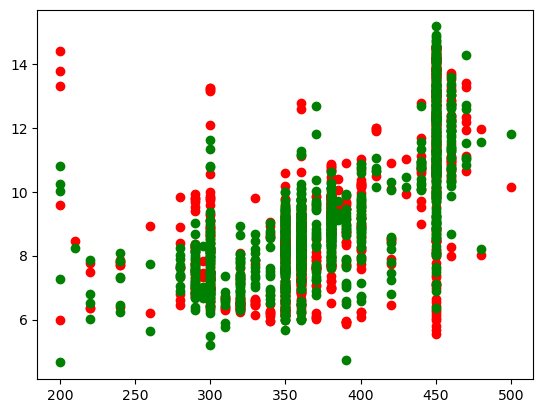

In [85]:
plt.scatter(X_final_4['c161'],Y,color='Red')
plt.scatter(X_final_4['c161'],y_predicted_final_4,color='Green')

In my analysis the most significant variable is the column number c39 because it is having a larger magnitude for the 
coefficient and also a smaller std error